# Regresión Logística
En esta sesión vamos a analizar una generalización del modelo de regresion lineal que permite modelar un conjunto de datos,  en que la variable a explicar es binaria y las variables explicativas son numéricas o categóricas. Se trata del modelo de regresión logística, que estimaremos en R con la función `glm`.


### Formalmente hablando

- Sea $y \in \{0,1\}$ la variable a explicar y $\textbf{x} \in \mathbb{R}^n$ las variables explicativas.
- Dos cambios respecto de la regresión lineal, 

El primero es que $y$ se modela como una v.a. con distribución $\textbf{Bernoulli}$ en lugar de una Normal, es decir:

$$p(y |\textbf{x},\beta)= Ber(y|\mu(\textbf{x}))$$

dónde $\mu(\textbf{x}) = \mathbb{E}[y|\textbf{x}] = p(y=1|\textbf{x})$

Y lo segundo es que, al igual que en la regresión lineal, se considera una combinación lineal de las variables explicativas, pero esta combinación lineal es pasada como parámetro a una función $\mu$ que toma valores en el intervalo $[0,1]$, de manera que:

$$\mu(x) = \sigma(\beta^T\textbf{x})$$

dónde $\sigma$ es la función sigmoidal, conocida también cono $\textbf{logística}$ o $\textbf{logit}$, y se define como

$$\sigma(\eta) = \frac{1}{1+exp(-\eta)} = \frac{e^{\eta}}{e^{\eta}+1}$$

Asi, se obtiene el modelo:
$$p(y|\textbf{x},\beta) = Ber(y|\sigma(\beta^T\textbf{x})$$

denominado regresión logística, por su similitud con la regresión lineal, aunque es una forma de clasificación mas que una regresión.


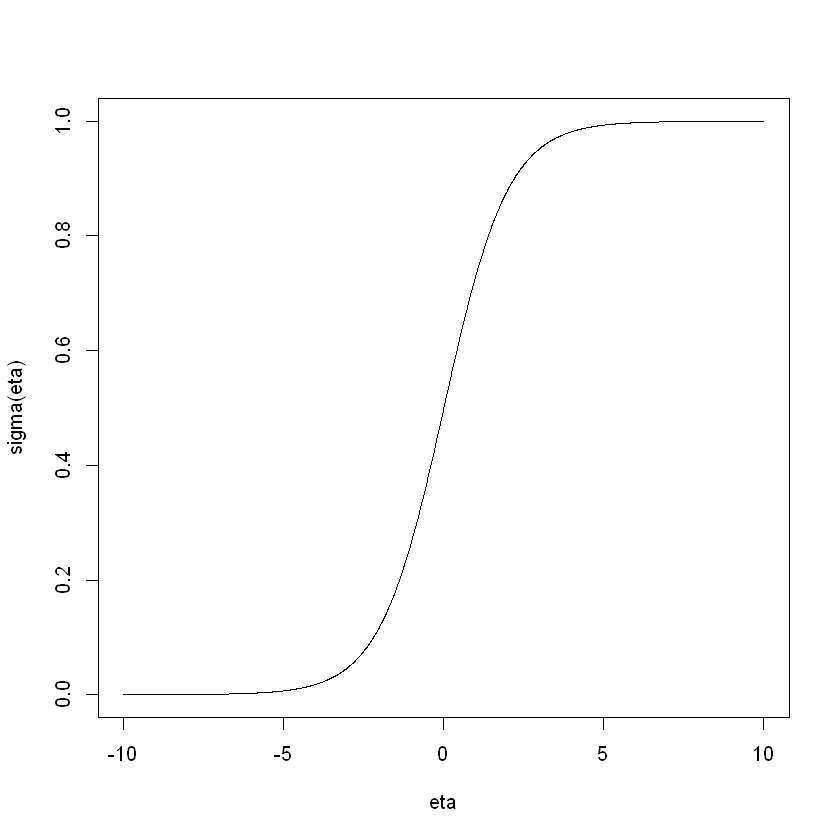

In [28]:
#gráfica de la función sigmoide
eta = seq(-10,10,by=0.01)
sigma <- function(x){return( exp(x)/(exp(x)+1))}
plot(eta,sigma(eta),type="l")


In [41]:
#Ejemplo de regresión logística para datos SAT
datos <- read.csv("datosSAT.csv",header=TRUE,sep=";")
summary(datos)
#TrLevel es el nivel alcanzado: 1 si pasó el curso 0 si no
#SAT es el puntaje obtenido en el test de Lenguaje
res<- glm(TrLevel ~ SAT, data=datos,family = binomial(link = "logit"))
summary(res)

    TrLevel         SAT       
 Min.   :0.0   Min.   :463.0  
 1st Qu.:0.0   1st Qu.:543.5  
 Median :1.0   Median :567.5  
 Mean   :0.7   Mean   :559.5  
 3rd Qu.:1.0   3rd Qu.:582.0  
 Max.   :1.0   Max.   :649.0  


Call:
glm(formula = TrLevel ~ SAT, family = binomial(link = "logit"), 
    data = datos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2918  -0.1830   0.3662   0.5057   1.5301  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -31.65827   12.69071  -2.495   0.0126 *
SAT           0.05878    0.02296   2.560   0.0105 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 36.652  on 29  degrees of freedom
Residual deviance: 21.993  on 28  degrees of freedom
AIC: 25.993

Number of Fisher Scoring iterations: 5


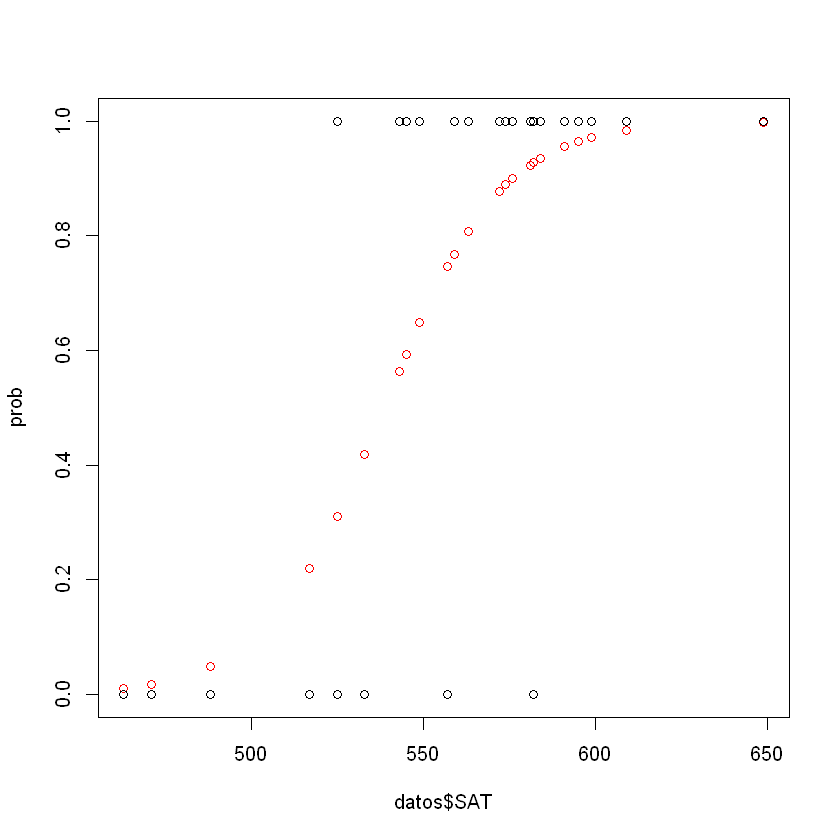

In [40]:
#graficamos los resultados
dat <-cbind(rep(1,30),datos$SAT)
prob <- sigma(dat%*%res$coefficients)
plot(datos$SAT,prob,col="red",ylim=c(0,1))
points(datos$SAT,datos$TrLevel)

Ejercicio 1: 
a) Interprete los resultados
b) Indage en la función glm el método de estimación del modelo logit que utiliza y los principales parámetros disponibles.
c) Describa formalmente el método de estimación del modelo logit que usa glm y haga una comparación con los otros métodos disponibles. Para ello use como referencia el Cap. 8 de "Machine Learning, a Probabilistic Perspective", K. Murphy.

In [36]:
#Ejemplo de regresión logística para datos de PSU de estudiantes de primer año universitario
#y su relación con la estrategia de aprendizaje Elaborativa del estudiante (0, bajo nivel - 1 normal o alto nivel)
#obtenida en un test de diagnóstico
datos <- read.csv("datosEjemplo.csv",header=TRUE,sep=";")
datos

Elaborativo,MAT,LENG,CIENCIA
0,429,573,443
0,572,534,497
1,631,692,611
0,713,654,694
1,591,523,537
0,610,530,558
1,619,628,409
0,596,628,625
1,644,466,523
0,644,628,591


Ejercicio 2: 
a) Ajuste un modelo logit a estos datos
b) Escoja la variable explicativa con mayor correlación con la variable binaria y rehaga los cálculos
c) Grafique e interprete sus resultados
